In [263]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle

sr=44100

CPU times: user 565 ms, sys: 23.3 ms, total: 588 ms
Wall time: 1.47 s


<Figure size 576x360 with 0 Axes>

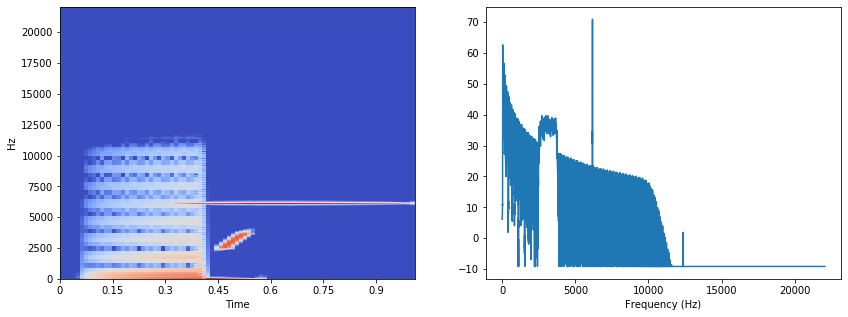

In [333]:
%%time
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params=[]
for i in range(5): 
    p=pg.RandomParams()
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
    params.append(p)

out=fx.norm(out,1)    
sd.play(out,blocking=True)
hp.specShow(out)

In [ ]:
%%time
#generate 10 sounds
import imp
imp.reload(pg)
imp.reload(hp)

for j in range(5000):
    out = dsp.buffer(length=1,channels=1)
    params=[]
    for i in range(3): 
        p=pg.RandomParams()
        s=pg.Synth(p)
        out.dub(s.buff,p.start)
        params.append(p)
    out=fx.norm(out,1)    
    out.write("generations/sounds/%d.wav"%j)
    with open("generations/pickles/%d.pkl"%j, 'wb') as pfile:
        pickle.dump(params,pfile,-1)